In [86]:
import pandas as pd
import numpy as np
import pingouin as pg
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [87]:
def get_correlation(df, corr_function):
    names = df.columns
    correlation = np.zeros((length, length))
    correlation[range(length), range(length)] = 1
    p_values = np.zeros((length, length))
    p_values[range(length), range(length)] = 1

    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            res = spearmanr(df_base[names[i]], df_base[names[j]])
            correlation[i, j] = correlation[j, i] = res[0]
            p_values[i, j] = p_values[j, i] = res[1]
    df_correlation = pd.DataFrame(correlation)
    df_p_values = pd.DataFrame(p_values)
    df_correlation.columns = df_p_values.columns = names
    df_correlation.index = df_p_values.index = names
    
    return df_correlation, df_p_values

In [88]:
length = 5
names = [f'var{i + 1}' for i in range(length)]

In [89]:
df_base = pd.read_excel('ms-data2-2022.xlsx', sheet_name='2-2',
                   header=None, names=names)
df_base.head()

,var1,var2,var3,var4,var5
0,4.519,7.698,23.751,18.929,10.421
1,1.880,5.603,0.274,3.846,4.352
2,3.543,5.828,15.930,5.631,6.402
3,3.407,6.534,14.081,4.395,10.098
4,3.102,6.398,15.516,9.742,3.777


In [90]:
corr, p_vals = get_correlation(df_base, pearsonr)

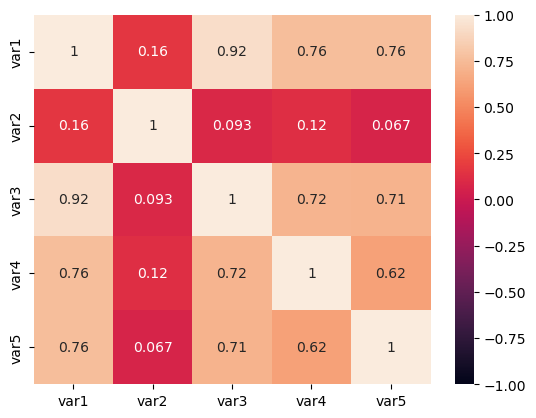

In [91]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

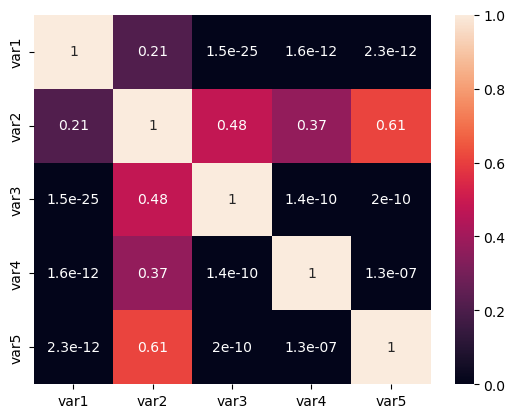

In [92]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [93]:
partial_corr = pg.partial_corr(data=df_base, x='var1', y='var2', covar='var3')

print(partial_corr)

TypeError: cov() got an unexpected keyword argument 'numeric_only'

In [ ]:
df_base.cov(numeric_only=True)

In [ ]:
corr, p_vals = get_correlation(df_base, spearmanr)

In [ ]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

In [ ]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [ ]:
pg.partial_corr(data=df_base, x='var1', y='var2', covar=['var3', 'var4'], method='pearson')

In [ ]:
df_base.cov(numeric_only=True)

In [94]:
??pd.DataFrame.cov

In [ ]:
df_norm = pd.read_excel('ms-data2-2022.xlsx', sheet_name='1вар-адекв',
                   header=None, names=names)
df_norm.head()

In [ ]:
a = np.array([[1, 2], [3, 4]])
d = pd.DataFrame(a)
d.columns = ['12345', '2351']
d.index = ['12345', '2351']
d